In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import koreanize_matplotlib

In [2]:
from preamble import *

## score,R^2 외 분류.회귀 성능 측정 방법

### 교차 검증

* cross_val_score

* cross_validate

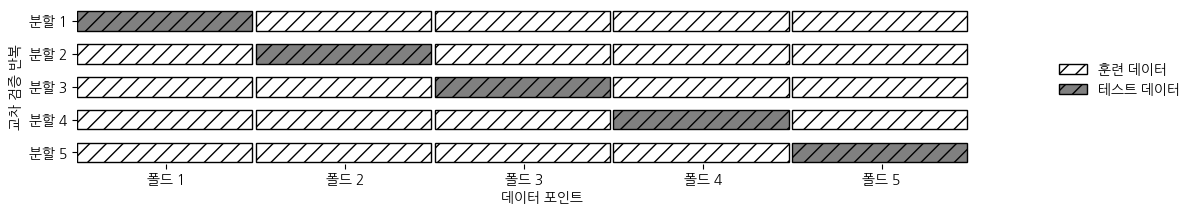

In [3]:
#train, test 여러번 나누기 

mglearn.plots.plot_cross_validation()

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

#사용법: cross_val_score(모델, X, y) 집어넣기
#디폴트 : 5겹 교차검증이므로 5개값 나옴
scores=cross_val_score(logreg, iris.data, iris.target)
#사실 이 cross_val_scores는 cross_validate 중 test_score 점수만을 반환한다 !! 
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]


In [6]:
scores10=cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores10)

교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


In [7]:
#교차검증의 평균
scores10.mean()

0.9733333333333334

In [9]:
#cross_validate -> 분할마다 훈련과 테스트에 걸린 시간을 담아서 딕셔너리로 반환

from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.012, 0.014, 0.009, 0.01 , 0.01 ]),
 'score_time': array([0.001, 0.   , 0.001, 0.   , 0.001]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [ ]:
#해석
#각 다섯번 했는데, 훈련시키는데 걸렸던 시간
#score- 테스트 데이터를 평가하는데 걸린 시간
#test - 테스트 데이터에 대한 모델의 성능 점수 
#train 데이터에 대한 모델의 성능 점수-과적합인지 아닌지 봐야함

In [12]:
res_df=pd.DataFrame(res)
res_df
print("평균 시간과 점수:\n", res_df.mean())

평균 시간과 점수:
 fit_time       1.10e-02
score_time     5.96e-04
test_score     9.73e-01
train_score    9.75e-01
dtype: float64


In [13]:
res_df

,fit_time,score_time,test_score,train_score
0,1.20e-02,1.01e-03,0.97,0.97
1,1.39e-02,0.00e+00,1.00,0.97
2,9.00e-03,9.74e-04,0.93,0.98
3,1.00e-02,0.00e+00,0.97,0.98
4,9.97e-03,9.98e-04,1.00,0.97


In [14]:
iris.target
# 1/3은 클래스 0, 1/3은 1, 1/3은 2
#만약에 이걸 그대로 3겹 교차검증을 하게 된다고 하면 첫번째 폴드 0은 클래스 0만을, 나머지 훈련 세트는 클래스 1과 2만을 가지게 됨
#그럼 정확도가 난리나겓죠 -> 계층별 교차 검증 필요

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### stratified 검증 - KFold

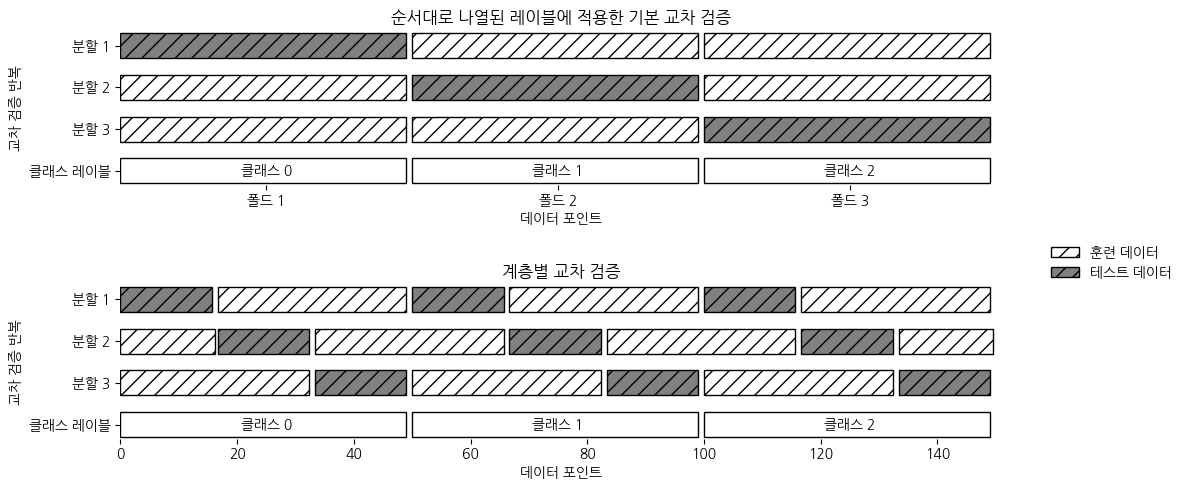

In [15]:
mglearn.plots.plot_stratified_cross_validation()
#각 폴드가 클래스를 정확한 비율로 나눠 가질 수 있도록 한다.
#폴드는 나눈거, 클래스는 타겟이 가지고 있는 값, 데이터포인트는 갯수. 

In [18]:
from sklearn.model_selection import KFold
#KFold는 분할기, 분할기를 이용하여 5개 폴드를 만드는, 분할하는 객체생성
kfold = KFold(n_splits=5)

In [20]:
#그리고 크발스에 이 5개짜리 분할기를 cv= 파람에 전달함 
cross_val_score(logreg, iris.data, iris.target, cv=kfold)


array([1.   , 1.   , 0.867, 0.933, 0.833])

In [21]:
kfold=KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)
#그냥 KFold만 전달했을때, 3개씩 폴드를 위처럼 나누니까 그냥 0. 1. 2 만을 가지는 폴드 세개가 되어서 점수 엉망

array([0., 0., 0.])

In [22]:
kfold=KFold(n_splits=3, shuffle=True, random_state=0)
#분할기에 shuffle=True 셔플 전달해주기!!!!!
cross_val_score(logreg, iris.data, iris.target, cv=kfold)


array([0.98, 0.96, 0.96])

## LOOCV

> 작은 데이터셋- 폴드 하나에 샘플 하나

In [31]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores=cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차검증 분할 횟수:",len(scores), ", 평균 정확도:", scores.mean())


교차검증 분할 횟수: 150 , 평균 정확도: 0.9666666666666667


### shuffle-split - 부분 샘플링 

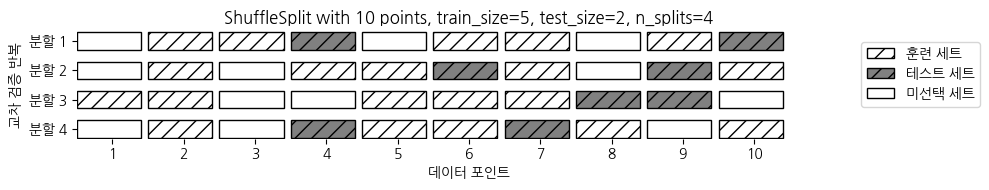

In [32]:
mglearn.plots.plot_shuffle_split()

In [34]:
from sklearn.model_selection import ShuffleSplit

# 반복횟수를 훈련세트,테스트세트 독립적으로 조절해야 할 때.
# 전체 데이터 다 안쓰고 일부만 쓰고자 할 때.
shuffle_split=ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores=cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
scores

array([0.96 , 0.947, 0.987, 0.973, 0.96 , 0.973, 0.933, 0.947, 0.96 ,
       0.947])

### GroupKFold - 훈련과 테스트 안 섞이게 그룹 지정하기

In [38]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y=make_blobs(n_samples=12, random_state=0)
#group을 지정해서(원래 지정할 필요는 없음 잘볼라고 지정함)
#분할 1은 첫번재 방법, 분할 2는 두번째, 분할3은 세번째.

groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores=cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
scores

array([0.75 , 0.6  , 0.667])

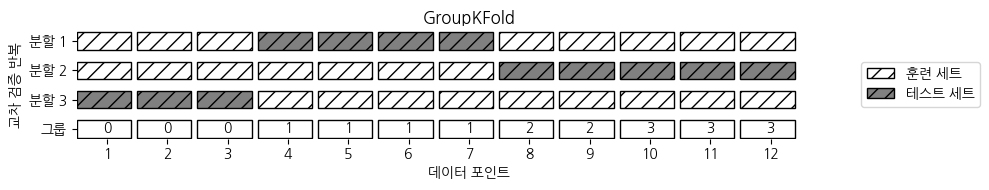

In [39]:
mglearn.plots.plot_group_kfold()
#이렇게 하면 테스터의 성능을 볼 때, 하나라도 중첩된 거(학습 하나라도 된거)를 만나지 않기 때문에
#완전 찐 테스터의 성능을 볼 수 있게 됨.

In [42]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42) #10*5 50번 repeat 해줌 
scores=cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print(scores, "\n교차 검증 평균 점수:", scores.mean())

[1.    0.967 0.933 1.    0.933 0.967 0.967 0.933 1.    0.967 0.933 1.
 1.    0.967 0.967 0.9   1.    1.    0.933 0.967 0.933 0.967 0.967 1.
 0.967 1.    0.967 0.967 0.9   1.    0.967 0.967 0.967 0.967 0.933 0.967
 0.967 1.    1.    0.9   0.967 1.    0.9   0.967 0.967 0.9   0.967 0.967
 1.    0.967] 
교차 검증 평균 점수: 0.9646666666666667


### 그리드 서치

> SVM의 "C" : 얼마나 "데이터" 준수하는지를 결정 -> 규제 강도 조절 -> 데이터 포인트가 결정 경계에서 떨어져 있을 수 있는 허용 오차 조절

* C가 클수록 = 허용오차 적고 정확하게 분류하려고 함 = 모델은 규제 없이 데이터만 따라 가려고 함.

* C가 작을수록 = 허용오차 크고 데이터보다는 모델 따라가려고 함 = 규제 강함.

> SVM의 "gamma" : 데이터 포인트 간의 영향 "거리"

* gamma가 클수록 = 표준편차 그래프에서 쪼삣, 데이터 포인트가 좁은 범위 내에서 민감함. 모델은 복잡하고 학습 데이터 잘 따름. 

* gamma가 작을수록 = 표준편차 그래프에서 완만하고 널널하게, 데이터 포인트 간 영향거리가 넓어 멀리 있는 애들끼리도 영향 미침.


In [48]:
#간단한 그리드 서치 구현
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test=train_test_split(iris['data'], iris['target'], random_state=0)
print(X_train.shape[0], X_test.shape[0])

112 38


In [54]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
     for C in [0.001, 0.01, 0.1, 1, 10, 100]: #매개변수 각 조합해보며 svc 훈련시킴

          svm=SVC(gamma=gamma, C=C)
          svm.fit(X_train, y_train)
          score=svm.score(X_test, y_test)
          #점수가 더 높으면 기록하도록 하는 if문 추가함
          if score > best_score:
               best_score = score
               best_parameters = {'C':C, 'gamma':gamma}

print("최고 점수:", best_score, "최적 매개변수:", best_parameters)

최고 점수: 0.9736842105263158 최적 매개변수: {'C': 100, 'gamma': 0.001}


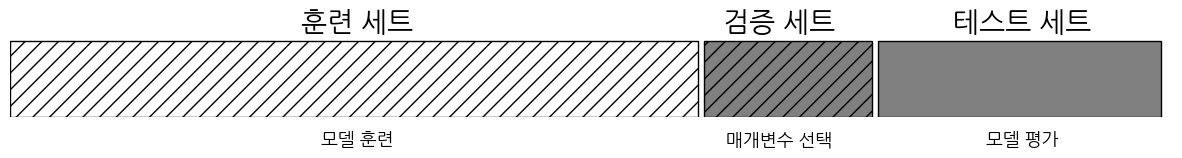

In [55]:
# 훈련때 1도 사용되지 않는 찐 테스트 데이터를 통해서 성능을 검증해 보기 위하여
#데이터를 두개가 아니고 "검증 세트" 추가해서 세 개의 세트로 나눠봄
mglearn.plots.plot_threefold_split()

In [60]:
from sklearn.svm import SVC

#1번.훈련+검증 / 테스트 로 분할하고
X_trainval, X_test, y_trainval, y_test=train_test_split(iris['data'], iris['target'], random_state=0)
#2번.그 훈련+검증을 다시 훈련 세트과 검증 세트로 분할함
X_train, X_valid, y_train, y_valid=train_test_split(X_trainval, y_trainval, random_state=1)
print(X_train.shape[0], X_valid.shape[0], X_test.shape[0])



84 28 38


In [61]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
     for C in [0.001, 0.01, 0.1, 1, 10, 100]: #매개변수 각 조합해보며 svc 훈련시킴

          svm=SVC(gamma=gamma, C=C)
          svm.fit(X_train, y_train)
          score=svm.score(X_valid, y_valid)
          #점수가 더 높으면 기록하도록 하는 if문 추가함
          if score > best_score:
               best_score = score
               best_parameters = {'C':C, 'gamma':gamma}

#훈련 세트와 검증 세트를 합쳐 모델을 다시 만들고
#테스트 세트를 사용해 평가함 
svm=SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score=svm.score(X_test, y_test)

In [62]:
print("검증세트 최고 점수:", best_score, "최적 매개변수:", best_parameters, "최적매개변수에서 테스트점수:",test_score)

검증세트 최고 점수: 0.9642857142857143 최적 매개변수: {'C': 10, 'gamma': 0.001} 최적매개변수에서 테스트점수: 0.9210526315789473


In [ ]:
#해석 : 테스트점수가 낮아졌다고 할 수도 있겠지만, 
#세개로 나눠서 실제로 찐 새로 보는 데이터에 대해서 테스트를 해본 거기 때문에 92%가 더 정확하다고 볼 수 있음 

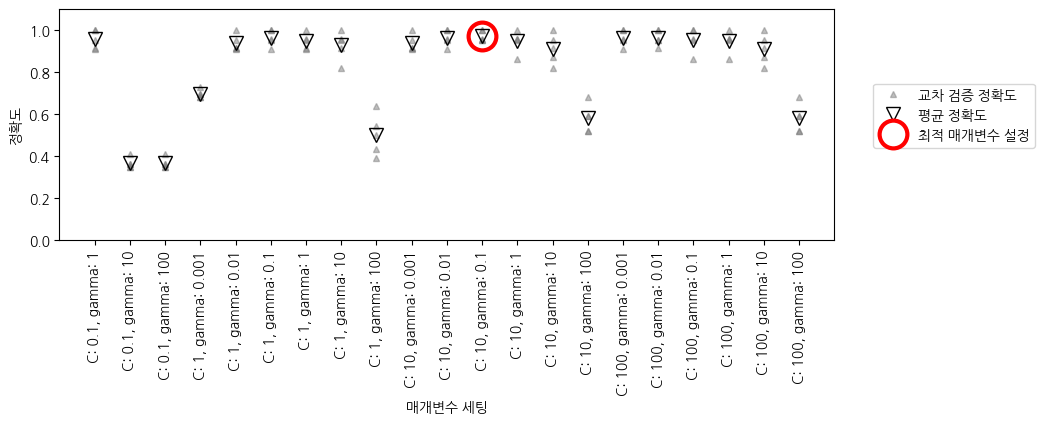

In [63]:
mglearn.plots.plot_cross_val_selection()


In [64]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [66]:
#GridSearchCV 라는 그리드 객체 만들어서 원하는 교차 검증 넣어보기로 함 

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
#GridSearchCV(모델(), 모델의 하이퍼파람을 딕셔너리로 저장한거, 교차 검증 폴드 수, 트레인 스코어도 반환하도록.)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [68]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))
print("최고 성능 모델:\n", grid_search.best_estimator_)

테스트 세트 점수: 0.97
최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97
최고 성능 모델:
 SVC(C=10, gamma=0.1)


In [70]:
import pandas as pd
pd.set_option('display.max_columns', None)
results=pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.0,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,0.0
param_gamma,0.0,0.01,0.1,1.0,10.0
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.35,0.35,0.35,0.35,0.35
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


TypeError: Only length-1 arrays can be converted to Python scalars

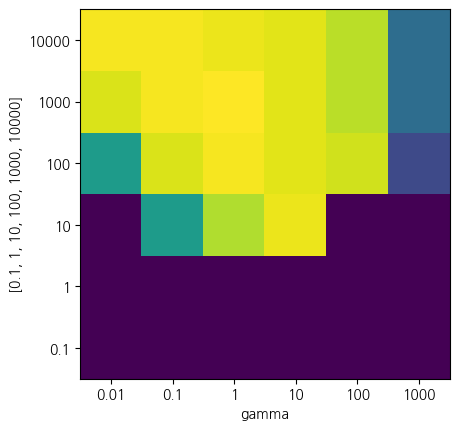

In [74]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel=param_grid['C'], yticklabels=param_grid['C'], cmap="viridis")
plt.show() # 책에는 없음

### 중첩 교차 검증

In [75]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
#SVC()가지고 그리드서치를 실행할건데, 폴드 나누는 횟수는 다섯번이고, SVC를 할때 훈련세트 테스트세트 나눠지는게 다섯번이잖아
#5겹 교차 검증에 5*5 총 25개의 조합인 파라미터가 있으므로
#총 곱하면 5겹교차검증을 * 25개조합 이므로 125번의 훈련, 검증 한다는 뜻
#교차 검증을 다섯번 = cv=5 = 같은 데이터셋을 다섯 가지의 방법으로 다 다르게 쪼갈라 본다.
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
#cross_val_score 얘가 평가할 모델은 그리드 서치임
#
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())

교차 검증 점수:  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수:  0.9800000000000001


## 로지스틱 회귀(이진 분류) 평가 결과 

### 오차 행렬

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
# 이진 분류 설정하는 방법!!!!
# 이렇게 작성하면
# ** 데이터셋의 목표값 중에서 9인 경우에만 True, 그렇지 않으면 False를 반환 **
#이렇게 작성함으로서 y는 boolean으로 true 아니면 false를 가지게 됨 

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

confusion=confusion_matrix(y_test, pred_logreg)
#행은 정답 클래스, 열은 예측 클래스.

logreg 점수: 0.98


In [80]:
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

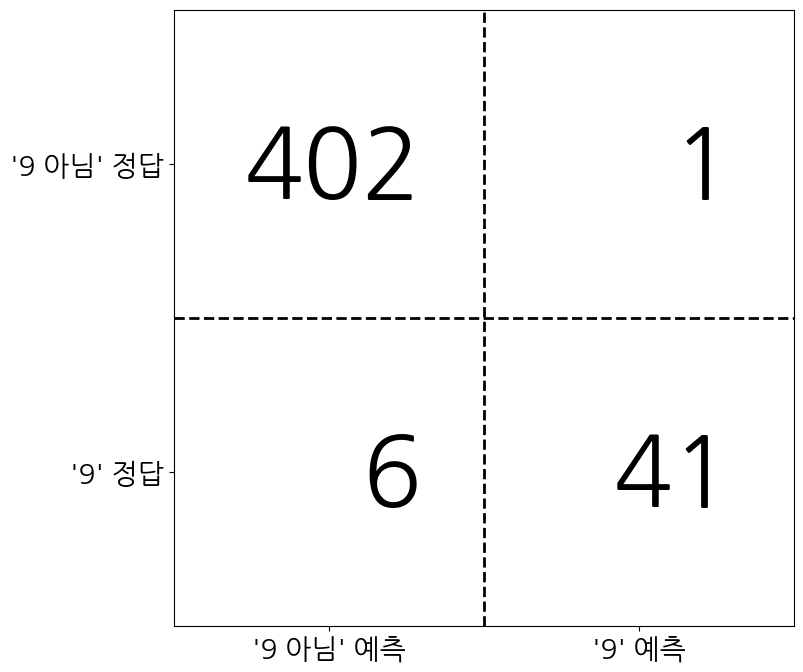

In [81]:
mglearn.plots.plot_confusion_matrix_illustration()
# 위 함수에 따르면, 클래스는 '9'와 '9가 아님'으로 나누어지게 됨 

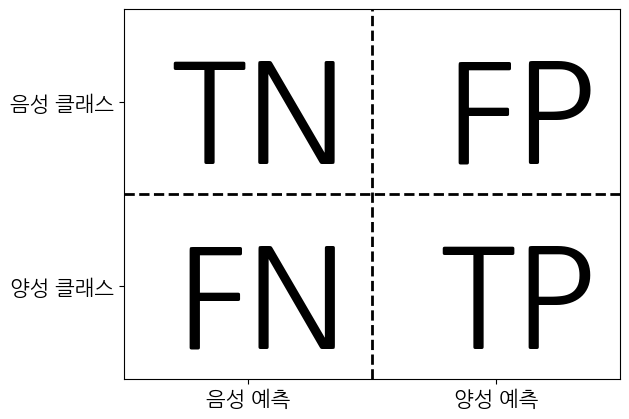

In [82]:
mglearn.plots.plot_binary_confusion_matrix()
#알파벳 순서대로 앞에거는 찐으로 뭔지. 뒤 알파벳은 분류값이 뭔지. 